<a href="https://colab.research.google.com/github/DK-77/CE059_Dhruv_Kathrotiya/blob/main/Lab4/Lab4_Task2_CE059.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CE059 - cancer dataset,60-40, one-hot encoding

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from subprocess import call

In [5]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
data, target = load_breast_cancer(return_X_y = True)

In [6]:
data
#feature_names
load_breast_cancer().feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer_data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [8]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
print("Features shape : ",data.shape)
print("Label shape: ",target.shape)

Features shape :  (569, 30)
Label shape:  (569,)


In [10]:
label = ['Benign','Malignant']

In [11]:
from sklearn import metrics

In [13]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.4, random_state = 59)

In [14]:
dc = DecisionTreeClassifier()
dc.fit(data_train, target_train)
target_pred = dc.predict(data_test)
print("Accuracy: ",metrics.accuracy_score(target_test, target_pred))

Accuracy:  0.9166666666666666


In [15]:
#confusion matrix creation
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, target_pred)

array([[ 84,  10],
       [  9, 125]])

In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(target_test,target_pred)
recall = recall_score(target_test,target_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: 0.9259259259259259
recall: 0.9328358208955224


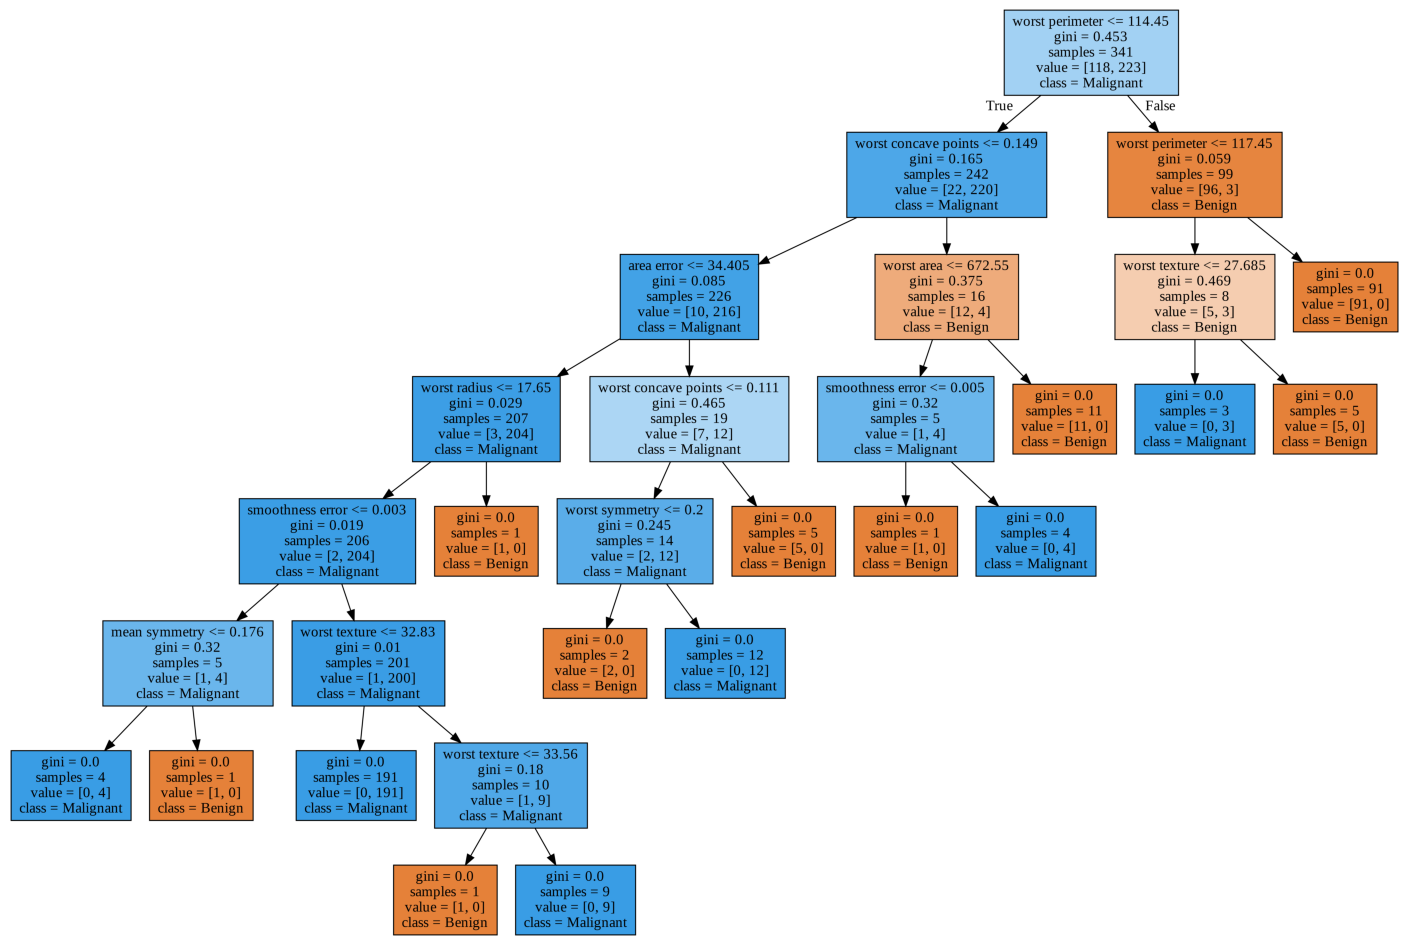

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(dc, out_file='tree_entropy.dot',
               feature_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                              'mean smoothness', 'mean compactness', 'mean concavity',
                              'mean concave points', 'mean symmetry', 'mean fractal dimension',
                              'radius error', 'texture error', 'perimeter error', 'area error',
                              'smoothness error', 'compactness error', 'concavity error',
                              'concave points error', 'symmetry error',
                              'fractal dimension error', 'worst radius', 'worst texture',
                              'worst perimeter', 'worst area', 'worst smoothness',
                              'worst compactness', 'worst concavity', 'worst concave points',
                              'worst symmetry', 'worst fractal dimension'],
               class_names=['Benign','Malignant'], 
               filled=True)

#png convert
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

#Display
import matplotlib.pyplot as plt
plt.figure(figsize = (25, 25))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();